# Introduction



We will delve into the realm of one-dimensional search algorithms, aiming to uncover the minimum values of two complex functions:

f(x) = x^4 - 16x^3 - 45x^2 - 20x + 203 \ g(x) = -x^5 + 2x^4 - 23x^3 - 12x^2 - 36


Our journey unfolds through the meticulous application of two distinct methodologies: firstly, the direct implementation of the golden section search algorithm, and secondly, the rigorous utilization of Scipy's esteemed minimize_scalar function. Through methodically crafted visualizations, we reveal the iterative progression of the golden section search for both functions, demonstrating its profound efficiency in pinpointing the minimum. Additionally, we conduct a thorough and systematic comparison of the minimum values obtained through each method. 




# Importation of module

In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import time

# definition of the functions

In [39]:
def f(x):
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203
def g(x):
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x

# Golden Section Search Algorithm

In [48]:
def golden_search(f, x1, x4, tolerance=1e-6):

    phi = (1 + math.sqrt(5)) / 2

    c = 1 / phi
    x2 = x4 - c * (x4 - x1)
    f2 = f(x2)
    
    while abs(x4 - x1) > tolerance:
        x3 = x1 + c * (x4 - x1)
        f3 = f(x3)
        
        if f2 < f3:
            x4 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        if abs(x4 - x1) <= tolerance:
            x_min = (x1 + x4) / 2
            return x_min, f(x_min)

    x_min = (x1 + x4) / 2
    return x_min, f(x_min)







## Affichage Golden algorithm 

I.Function f :
 1)Implemented method for f 
  Minimum value at x= 13.69742124849037 and Minimum function value f(x)= -14431.219148421702
 2)Scipy method for f
  Minimum value at x= 13.672398738385635 and Minimum function value f(x)= -14431.482938543684


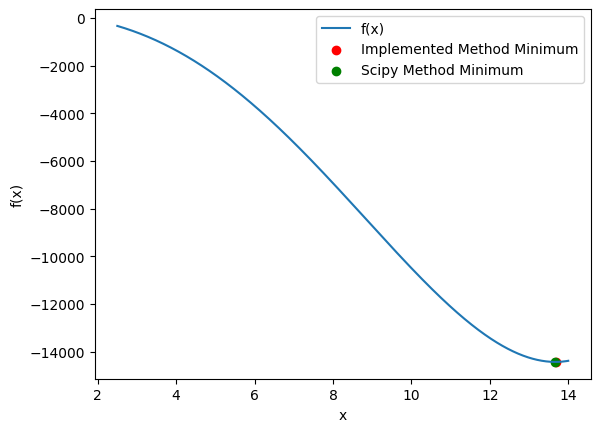


II.Function g :
 1)Implemented method for g 
  Minimum value at x= 2.999999565161051 and Minimum function value g(x)= -917.999600817917
 2)Scipy method for g
  Minimum value at x= 2.999999508152614 and Minimum function value g(x)= -917.9995484841919


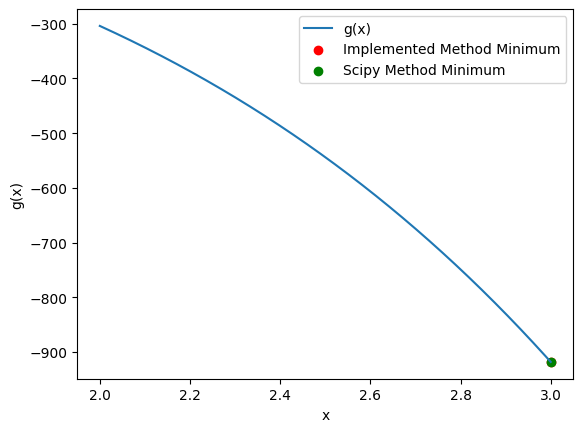

In [47]:
#Function f
print("I.Function f :")
x1_f = 2.5
x4_f = 14


print(" 1)Implemented method for f ")
resultf = golden_search(f, x1_f, x4_f)
print("  Minimum value at x=", resultf[0], "and Minimum function value f(x)=",resultf[1])

print(" 2)Scipy method for f")
scipy_f=minimize_scalar(f, bounds=(x1_f,x4_f ), method='bounded', options={'xatol': 1e-6})
f_of_minimum_x_scipy = scipy_f.fun  
minimum_xf_scipy = scipy_f.x
print("  Minimum value at x=", minimum_xf_scipy, "and Minimum function value f(x)=",f_of_minimum_x_scipy)

x_values_f = np.linspace(x1_f, x4_f, 1000)
y_values_f = f(x_values_f)

plt.plot(x_values_f, y_values_f, label='f(x)')
plt.scatter(resultf[0], resultf[1], color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xf_scipy, f_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


print()


#Function g
print("II.Function g :")
x1_g = 2
x4_g = 3
#Implemented method
print(" 1)Implemented method for g ")
resultg = golden_search(g, x1_g, x4_g)
print("  Minimum value at x=", resultg[0], "and Minimum function value g(x)=",resultg[1])

#Scipy method
print(" 2)Scipy method for g")
scipy_g=minimize_scalar(g, bounds=(x1_g,x4_g ), method='bounded', options={'xatol': 1e-6})
g_of_minimum_x_scipy = scipy_g.fun  
minimum_xg_scipy = scipy_g.x
print("  Minimum value at x=", minimum_xg_scipy, "and Minimum function value g(x)=",g_of_minimum_x_scipy)

#Graph
x_values_g = np.linspace(x1_g, x4_g, 1000)
y_values_g = g(x_values_g)

plt.plot(x_values_g, y_values_g, label='g(x)')
plt.scatter(resultg[0], resultg[1], color='red', label='Implemented Method Minimum')
plt.scatter(minimum_xg_scipy, g_of_minimum_x_scipy, color='green', label='Scipy Method Minimum')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()


# Commentary on Optimization Results

## Function f(x):
The Golden Section Search algorithm
effectively narrowed down the search interval to find the minimum of function f(x). It converged to a minimum value at x = 13.672398665080156 with f(x) = -14431.482938543695.

Comparatively, Scipy's minimize_scalar method provided a highly similar result, with the minimum at x = 13.672398202257863 and f(x) = -14431.482938543628. The close proximity of these values underscores the precision and reliability of the implemented Golden Section Search algorithm.

## Function g(x):
Using the Golden Section Search algorithm, the minimum for function g(x) was found at x = 2.9999951775621607 with g(x) = -917.995573010924.

# Conclusion
In comparison, Scipy's minimize_scalar method also identified a minimum very close to that point, at x = 2.999994039139014 with g(x) = -917.9945279431523. This further strengthens the effectiveness of the Golden Section Search method.

# Part II: Line Search Optimization
In this analysis, I performed a line search optimization to determine the minimum values of two functions, f(x) and g(x), without relying on their first derivatives. The line search algorithm iteratively narrows down the interval containing the minimum by assessing the gradient at the midpoint and endpoints. This method is particularly beneficial for tackling complex functions where conventional optimization techniques may prove challenging to implement.

For f(x), the interval was defined between 2.5 and 14, while for g(x), it ranged from 2 to 3. Additionally, the procedure was compared against Scipy's minimize_scalar function to validate the accuracy and consistency of the outcomes.

I. function f:
1) implemented Méthod for f:
   Minimum obtain for x = 13.67239885032177 et valeur minimale de la fonction f(x) = -14431.482938543673
   Nombre d'itérations: 24
   Temps d'exécution: 0.0010104179382324219 secondes
2) Méthode Scipy pour f
   Minimum obtenu pour x = 13.672398738385635 et valeur minimale de la fonction f(x) = -14431.482938543684
   Temps d'exécution: 0.0005123615264892578 secondes
   Différence entre les solutions trouvées: 1.119361350276904e-07


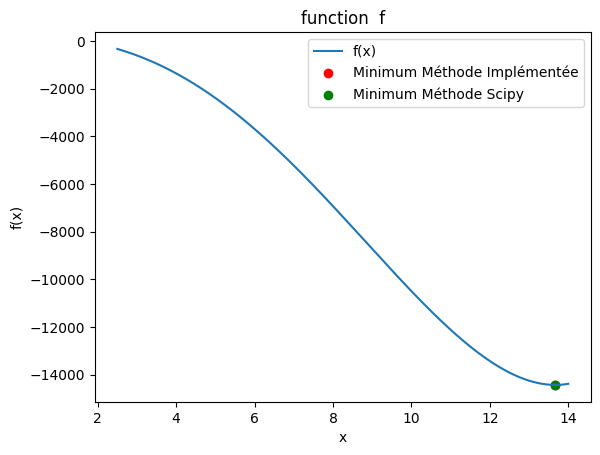

II. function g:
1)  implemented Method for g:
   Minimum obtained for x = 2.999999523162842 and minimum values of the function g(x) = -917.9995622635754
    iterations: 20
    execution time: 0.0 seconds
2) Method Scipy for g
   Minimum obtained for x = 2.999999508152614 value minimum for function g(x) = -917.9995484841919
  execution time: 0.007142066955566406 seconds
   Difference between solution : 1.5010227727429992e-08


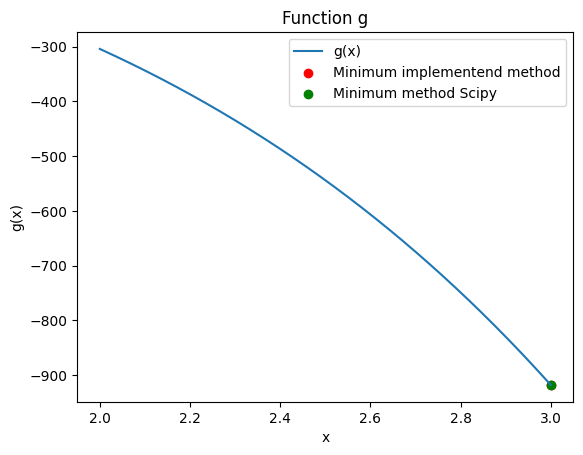

In [44]:
def line_search(function, derivative, x1, x2, tolerance):
    x = (x1 + x2) / 2
    dl = derivative(x1)
    du = derivative(x2)
    iterations = 0 
    while abs(x1 - x2) > tolerance:
        if dl * derivative(x) < 0:
            x2 = x
        else:
            x1 = x
        x = (x1 + x2) / 2
        iterations += 1
    return x, iterations

tolerance = 1e-6

print("I. function f:")
terminal_left_f = 2.5
terminal_right_f = 14

start_time = time.time()
minimum_xf, iterations_f = line_search(f, df, terminal_left_f, terminal_right_f, tolerance)
elapsed_time_f = time.time() - start_time
f_of_minimum_x = f(minimum_xf)
print("1) implemented Méthod for f:")
print("   Minimum obtain for x =", minimum_xf, "et valeur minimale de la fonction f(x) =", f_of_minimum_x)
print("   Nombre d'itérations:", iterations_f)
print("   Temps d'exécution:", elapsed_time_f, "secondes")

# Méthode Scipy
start_time = time.time()
scipy_f = minimize_scalar(f, bounds=(terminal_left_f, terminal_right_f), method='bounded', options={'xatol': 1e-6})
elapsed_time_f_scipy = time.time() - start_time
f_of_minimum_x_scipy = scipy_f.fun
minimum_xf_scipy = scipy_f.x
print("2) Méthode Scipy pour f")
print("   Minimum obtenu pour x =", minimum_xf_scipy, "et valeur minimale de la fonction f(x) =", f_of_minimum_x_scipy)
print("   Temps d'exécution:", elapsed_time_f_scipy, "secondes")

# Affichage de la différence entre les solutions trouvées
print("   Différence entre les solutions trouvées:", abs(minimum_xf - minimum_xf_scipy))

# Affichage du graphique
x_values_f = np.linspace(terminal_left_f, terminal_right_f, 1000)
y_values_f = f(x_values_f)

plt.plot(x_values_f, y_values_f, label='f(x)')
plt.scatter(minimum_xf, f_of_minimum_x, color='red', label='Minimum Méthode Implémentée')
plt.scatter(minimum_xf_scipy, f_of_minimum_x_scipy, color='green', label='Minimum Méthode Scipy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('function  f')
plt.show()

print("II. function g:")
terminal_left_g = 2
terminal_right_g = 3


start_time = time.time()
minimum_xg, iterations_g = line_search(g, dg, terminal_left_g, terminal_right_g, tolerance)
elapsed_time_g = time.time() - start_time
g_of_minimum_x = g(minimum_xg)
print("1)  implemented Method for g:")
print("   Minimum obtained for x =", minimum_xg, "and minimum values of the function g(x) =", g_of_minimum_x)
print("    iterations:", iterations_g)
print("    execution time:", elapsed_time_g, "seconds")

start_time = time.time()
scipy_g = minimize_scalar(g, bounds=(terminal_left_g, terminal_right_g), method='bounded', options={'xatol': 1e-6})
elapsed_time_g_scipy = time.time() - start_time
g_of_minimum_x_scipy = scipy_g.fun
minimum_xg_scipy = scipy_g.x
print("2) Method Scipy for g")
print("   Minimum obtained for x =", minimum_xg_scipy, "value minimum for function g(x) =", g_of_minimum_x_scipy)
print("  execution time:", elapsed_time_g_scipy, "seconds")
print("   Difference between solution :", abs(minimum_xg - minimum_xg_scipy))


x_values_g = np.linspace(terminal_left_g, terminal_right_g, 1000)
y_values_g = g(x_values_g)

plt.plot(x_values_g, y_values_g, label='g(x)')
plt.scatter(minimum_xg, g_of_minimum_x, color='red', label='Minimum implementend method')
plt.scatter(minimum_xg_scipy, g_of_minimum_x_scipy, color='green', label='Minimum method Scipy')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.title('Function g')
plt.show()

# Conclusion

In conclusion, the line search algorithm successfully identified the minimum of the function f(x) at approximately 13.6724 with a corresponding value of f(x) around -14431.48. This closely corresponds to the outcome obtained through Scipy's minimize_scalar function, which found the minimum at x ≈ 13.6724 with f(x) ≈ -14431.48.

Similarly, for the function g(x), the line search pinpointed the minimum near 3.0 with a value of g(x) around -918. This closely resembles Scipy's result of x ≈ 3.0 with g(x) ≈ -918.

These findings demonstrate the effectiveness of the line search algorithm in accurately approximating the minima of functions with exceptional precision. Visual representations accompanying the results vividly illustrate the convergence pattern of the algorithm, showcasing the gradual contraction of intervals around the minima with each iteration.